In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
!gdown --id 1FUnIXmaXptJi9f-upITAl-x5oH1R2iq8

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1FUnIXmaXptJi9f-upITAl-x5oH1R2iq8
To: /content/BIKE DETAILS.csv
100% 66.5k/66.5k [00:00<00:00, 64.0MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('BIKE DETAILS.csv')

df = df.dropna()
df.isnull().sum()
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [ ]:
df.shape

(626, 7)

In [ ]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of motorcycles in this dataset such as {}... \n".format(len(df.name.unique()), 
                                                                           ", ".join(df.name.unique()[0:5])))

There are 626 observations and 7 features in this dataset. 

There are 183 types of motorcycles in this dataset such as Royal Enfield Classic Gunmetal Grey, Yamaha Fazer FI V 2.0 [2016-2018], Honda CB Twister, Honda CB Hornet 160R, Bajaj Discover 125... 



In [ ]:
df[["name", "year","selling_price"]].head(10)

,name,year,selling_price
2,Royal Enfield Classic Gunmetal Grey,2018,150000
3,Yamaha Fazer FI V 2.0 [2016-2018],2015,65000
5,Honda CB Twister,2010,18000
6,Honda CB Hornet 160R,2018,78500
9,Bajaj Discover 125,2016,50000
10,Yamaha FZ16,2015,35000
11,Honda Navi,2016,28000
12,Bajaj Avenger Street 220,2018,80000
13,Yamaha YZF R3,2019,365000
15,Suzuki Access 125 [2007-2016],2012,25000


In [ ]:
# Groupby by year
year = df.groupby("year")

# Summary statistic of all motorcycles
year.describe().head()

selling_price                                                         \
             count          mean           std      min      25%      50%   
year                                                                        
2001           1.0  20000.000000           NaN  20000.0  20000.0  20000.0   
2004           1.0  18000.000000           NaN  18000.0  18000.0  18000.0   
2005           1.0  10000.000000           NaN  10000.0  10000.0  10000.0   
2006           4.0  11500.000000   4358.898944   6000.0   9000.0  12500.0   
2007           6.0  24983.333333  13053.798936  14900.0  16250.0  22500.0   

                       km_driven                ...                    \
          75%      max     count          mean  ...      75%      max   
year                                            ...                     
2001  20000.0  20000.0       1.0  50000.000000  ...  50000.0  50000.0   
2004  18000.0  18000.0       1.0  46700.000000  ...  46700.0  46700.0   
2005  10000.0  10000.0       1.0  55000.000000  ...  55000.0  55000.0   
2006  15000.0  15000.0       4.0  44000.000000  ...  50250.0  51000.0   
2007  25000.0  50000.0       6.0  53143.333333  ...  66250.0  80000.0   

     ex_showroom_price                                                         \
                 count          mean           std      min      25%      50%   
year                                                                            
2001               1.0  54852.000000           NaN  54852.0  54852.0  54852.0   
2004               1.0  54852.000000           NaN  54852.0  54852.0  54852.0   
2005               1.0  54852.000000           NaN  54852.0  54852.0  54852.0   
2006               4.0  51164.500000   4598.418677  46575.0  49344.0  50267.0   
2007               6.0  67382.333333  16033.275294  50267.0  53782.5  65647.5   

                        
          75%      max  
year                    
2001  54852.0  54852.0  
2004  54852.0  54852.0  
2005  54852.0  54852.0  
2006  52087.5  57549.0  
2007  82332.0  85011.0  

[5 rows x 24 columns]

In [ ]:
df[["name","year","selling_price"]].sort_values("year", ascending=False).head(10)

,name,year,selling_price
136,Royal Enfield Classic Gunmetal Grey,2020,190000
229,Yamaha Cygnus Ray ZR,2019,56000
405,Yamaha FZ25,2019,145000
677,Yamaha Saluto,2019,74000
969,Royal Enfield Classic 350,2019,120000
690,Honda Activa 5G,2019,62000
964,Royal Enfield Classic 350,2019,135000
963,Bajaj Dominar 400,2019,145000
962,KTM RC200,2019,165000
961,UM Renegade Mojave,2019,170000


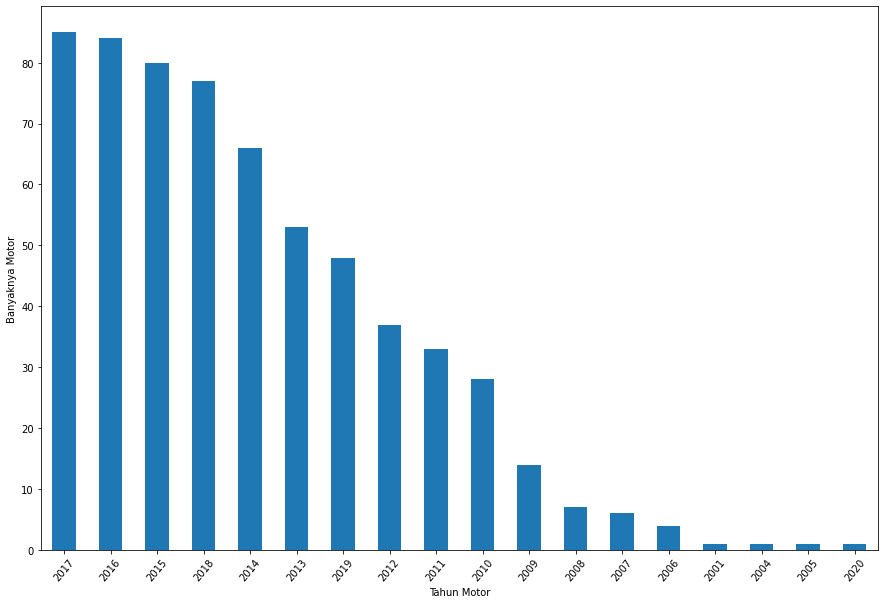

In [ ]:
plt.figure(figsize=(15,10))
year.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Tahun Motor")
plt.ylabel("Banyaknya Motor")
plt.show()

In [ ]:
name.max

<bound method GroupBy.max of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f3ad0edae50>>

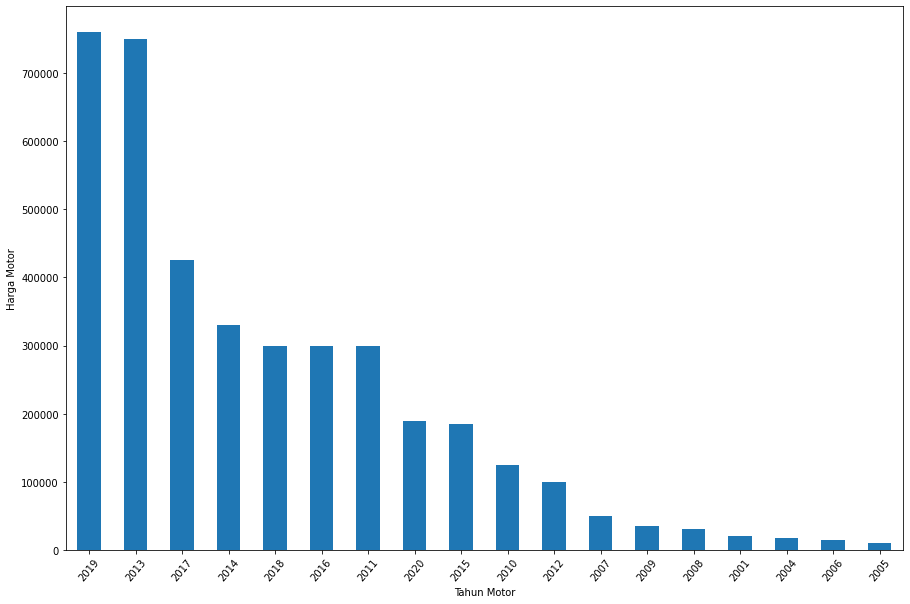

In [ ]:
plt.figure(figsize=(15,10))
name.max(numeric_only=True, min_count=-1).sort_values(by="selling_price",ascending=False)["selling_price"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Tahun Motor")
plt.ylabel("Harga Motor")
plt.show()

WORD CLOUD

In [ ]:
?WordCloud

In [ ]:
# Start with one review:
text = df.name[0]
print(text)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# # Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

KeyError: ignored